<div style="display:flow;
            border-radius: 30%;
            background-color: #7E5072;
            font-size: 210%;
            padding: 20px;
            color:white;
            border-radius: 50px;
            border-style: solid;
            border-color: black;">
<b>
Global Protests Data Analysis ✊✊📢</b>
</div>

This notebook analyzes global protests from 1990 to March 2020, focusing on things like:

- Regional and yearly trends,
- Protester demands and state responses,
- Statistical relationships and predictive modeling.

The dataset contains various scores related to democracy and governance, with detailed records of protests, violence, and demands.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# <div style="color:black;display:fill;border-radius:5px;background-color:#AB5A74;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:90%;margin:0"><b>1 |</b> Data Loading </p></div>

In [2]:
""" file_path = '/kaggle/input/protests-from-1990-to-march-2020/data.csv' """
file_path = './data.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,id,Country,Year,region,protest,protesterviolence,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,...,stateresponse6,stateresponse7,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
0,201990001,Canada,1990,North America,1,0,"political behavior, process",labor wage dispute,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
1,201990002,Canada,1990,North America,1,0,"political behavior, process",NaN,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
2,201990003,Canada,1990,North America,1,0,"political behavior, process",NaN,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
3,201990004,Canada,1990,North America,1,1,land farm issue,NaN,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,1,0.299385
4,201990005,Canada,1990,North America,1,1,"political behavior, process",NaN,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,1,0.299385


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   12652 non-null  int64  
 1   Country              12652 non-null  object 
 2   Year                 12652 non-null  int64  
 3   region               12652 non-null  object 
 4   protest              12652 non-null  int64  
 5   protesterviolence    12652 non-null  int64  
 6   protesterdemand1     12651 non-null  object 
 7   protesterdemand2     2561 non-null   object 
 8   protesterdemand3     335 non-null    object 
 9   protesterdemand4     641 non-null    object 
 10  stateresponse1       12629 non-null  object 
 11  stateresponse2       2372 non-null   object 
 12  stateresponse3       756 non-null    object 
 13  stateresponse4       199 non-null    object 
 14  stateresponse5       657 non-null    object 
 15  stateresponse6       13 non-null    

# <div style="color:black;display:fill;border-radius:5px;background-color:#AB5A74;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:90%;margin:0"><b>2 |</b> Initial Data Exploration  </p></div>

In [5]:
df.describe()

,id,Year,protest,protesterviolence,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
count,1.265200e+04,12652.000000,12652.0,12652.000000,12652.000000,12652.000000,12652.000000,12652.000000,12652.000000,12436.000000,12652.000000,12436.000000
mean,4.263609e+09,2006.626620,1.0,0.263990,0.566069,0.446735,0.370286,0.455604,0.420957,0.679471,0.440642,0.439530
std,2.363909e+09,8.812148,0.0,0.440811,0.251981,0.269327,0.201592,0.251682,0.246582,0.161842,0.496484,0.125796
min,2.019900e+08,1990.000000,1.0,0.000000,0.014000,0.006000,0.009000,0.006000,0.034000,0.197000,0.000000,0.237938
25%,2.052018e+09,1999.000000,1.0,0.000000,0.352000,0.211000,0.203000,0.241000,0.213000,0.558000,0.000000,0.309645
50%,3.732010e+09,2008.000000,1.0,0.000000,0.549000,0.403000,0.346000,0.415000,0.331000,0.694000,0.000000,0.455389
75%,6.452011e+09,2014.000000,1.0,1.000000,0.843000,0.755000,0.582000,0.727000,0.680000,0.807000,1.000000,0.539201
max,9.102017e+09,2019.000000,1.0,1.000000,0.922000,0.896000,0.807000,0.886000,0.885000,0.955000,1.000000,0.775399


In [6]:
df.isnull().sum()

id                         0
Country                    0
Year                       0
region                     0
protest                    0
protesterviolence          0
protesterdemand1           1
protesterdemand2       10091
protesterdemand3       12317
protesterdemand4       12011
stateresponse1            23
stateresponse2         10280
stateresponse3         11896
stateresponse4         12453
stateresponse5         11995
stateresponse6         12639
stateresponse7         11893
Electoral_Score            0
Liberal_Score              0
Participatory_Score        0
Deliberative_Score         0
Egalitarian_Score          0
HDI_Score                216
violenceStatus             0
predicted_prob           216
dtype: int64

# <div style="color:black;display:fill;border-radius:5px;background-color:#AB5A74;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:90%;margin:0"><b>3 |</b> Data Cleaning </p></div>

In [7]:
df['protesterdemand1'] = df['protesterdemand1'].fillna('Unknown')
df['HDI_Score'] = df['HDI_Score'].fillna(df['HDI_Score'].mean())

In [9]:
df.isnull().sum()

id                         0
Country                    0
Year                       0
region                     0
protest                    0
protesterviolence          0
protesterdemand1           0
protesterdemand2       10091
protesterdemand3       12317
protesterdemand4       12011
stateresponse1            23
stateresponse2         10280
stateresponse3         11896
stateresponse4         12453
stateresponse5         11995
stateresponse6         12639
stateresponse7         11893
Electoral_Score            0
Liberal_Score              0
Participatory_Score        0
Deliberative_Score         0
Egalitarian_Score          0
HDI_Score                  0
violenceStatus             0
predicted_prob           216
dtype: int64

In [10]:
df['protester_demands'] = df[['protesterdemand1', 'protesterdemand2', 'protesterdemand3', 'protesterdemand4']].apply(
    lambda x: ', '.join(filter(pd.notnull, x)), axis=1)

In [11]:
df.isnull().sum()

id                         0
Country                    0
Year                       0
region                     0
protest                    0
protesterviolence          0
protesterdemand1           0
protesterdemand2       10091
protesterdemand3       12317
protesterdemand4       12011
stateresponse1            23
stateresponse2         10280
stateresponse3         11896
stateresponse4         12453
stateresponse5         11995
stateresponse6         12639
stateresponse7         11893
Electoral_Score            0
Liberal_Score              0
Participatory_Score        0
Deliberative_Score         0
Egalitarian_Score          0
HDI_Score                  0
violenceStatus             0
predicted_prob           216
protester_demands          0
dtype: int64

In [12]:
df = df.drop(['protesterdemand2', 'protesterdemand3',
        'protesterdemand4', 'stateresponse2', 'stateresponse3',
        'stateresponse4', 'stateresponse5', 'stateresponse6',
        'stateresponse7'], 
        axis=1)

In [13]:
df.isnull().sum()

id                       0
Country                  0
Year                     0
region                   0
protest                  0
protesterviolence        0
protesterdemand1         0
stateresponse1          23
Electoral_Score          0
Liberal_Score            0
Participatory_Score      0
Deliberative_Score       0
Egalitarian_Score        0
HDI_Score                0
violenceStatus           0
predicted_prob         216
protester_demands        0
dtype: int64

In [14]:
df['stateresponse1'] = df['stateresponse1'].fillna('Unknown')

In [15]:
df.isnull().sum()

id                       0
Country                  0
Year                     0
region                   0
protest                  0
protesterviolence        0
protesterdemand1         0
stateresponse1           0
Electoral_Score          0
Liberal_Score            0
Participatory_Score      0
Deliberative_Score       0
Egalitarian_Score        0
HDI_Score                0
violenceStatus           0
predicted_prob         216
protester_demands        0
dtype: int64

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()

,id,Year,protest,protesterviolence,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
0,201990001,1990,1,0,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
1,201990002,1990,1,0,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
2,201990003,1990,1,0,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
3,201990004,1990,1,1,0.834,0.759,0.58,0.756,0.719,0.85,1,0.299385
4,201990005,1990,1,1,0.834,0.759,0.58,0.756,0.719,0.85,1,0.299385


In [19]:
df['predicted_prob'].fillna(df['predicted_prob'].mean(), inplace=True)
df.isnull().sum()

id                     0
Country                0
Year                   0
region                 0
protest                0
protesterviolence      0
protesterdemand1       0
stateresponse1         0
Electoral_Score        0
Liberal_Score          0
Participatory_Score    0
Deliberative_Score     0
Egalitarian_Score      0
HDI_Score              0
violenceStatus         0
predicted_prob         0
protester_demands      0
dtype: int64

# <div style="color:black;display:fill;border-radius:5px;background-color:#AB5A74;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:90%;margin:0"><b>4 |</b> Data Exploratory Analysis </p></div>

In [46]:
# Group the data by country,year and count the number of records in each country,keep the region column
country_year = df.groupby(['Country', 'Year', 'region']).size().reset_index(name='count')
country_year.head()

,Country,Year,region,count
0,Afghanistan,1991,Asia,1
1,Afghanistan,1997,Asia,1
2,Afghanistan,1998,Asia,1
3,Afghanistan,2002,Asia,1
4,Afghanistan,2005,Asia,2


In [47]:
data_country = df.groupby('Country').size().reset_index(name='count')
print(data_country.sort_values('count', ascending=False).head(10))

            Country  count
126  United Kingdom    574
43           France    542
59          Ireland    431
46          Germany    362
65            Kenya    350
9        Bangladesh    338
25            China    316
48           Greece    312
120        Thailand    249
86          Namibia    225


In [48]:
fig = px.bar(data_country, x='Country', y='count')
fig.show()

In [49]:
protests_by_year = df.groupby('Year')['protest'].sum().reset_index()

fig = px.line(protests_by_year, x='Year', y='protest',
            title='Number of Protests Over Time',
            labels={'protest': 'Number of Protests', 'Year': 'Year'})
fig.write_html("protests_over_time.html")

fig.show()

In [50]:
region_protests = df.groupby('region')['protest'].sum().reset_index()
fig = px.bar(region_protests, x='region', y='protest', color='region',
            title='Regional Distribution of Protests',
            labels={'protest': 'Number of Protests', 'region': 'Region'})
fig.show()

In [51]:
fig = px.choropleth(df, locations='Country', locationmode='country names',
                    color='violenceStatus', animation_frame='Year',
                    title='Protests and Violence Over Time',
                    labels={'violenceStatus': 'Violence Level'})
fig.show()

In [52]:
data_demand = df.groupby('protesterdemand1').size().reset_index(name='count')
data_demand = data_demand.sort_values('count', ascending=False)
fig = px.pie(data_demand, values='count', names='protesterdemand1', title='Protester Demand')
fig.show()

In [53]:
data_response = df.groupby('stateresponse1').size().reset_index(name='count')
data_response = data_response.sort_values('count', ascending=False)
fig = px.pie(data_response, values='count', names='stateresponse1', title='State Response')
fig.show()

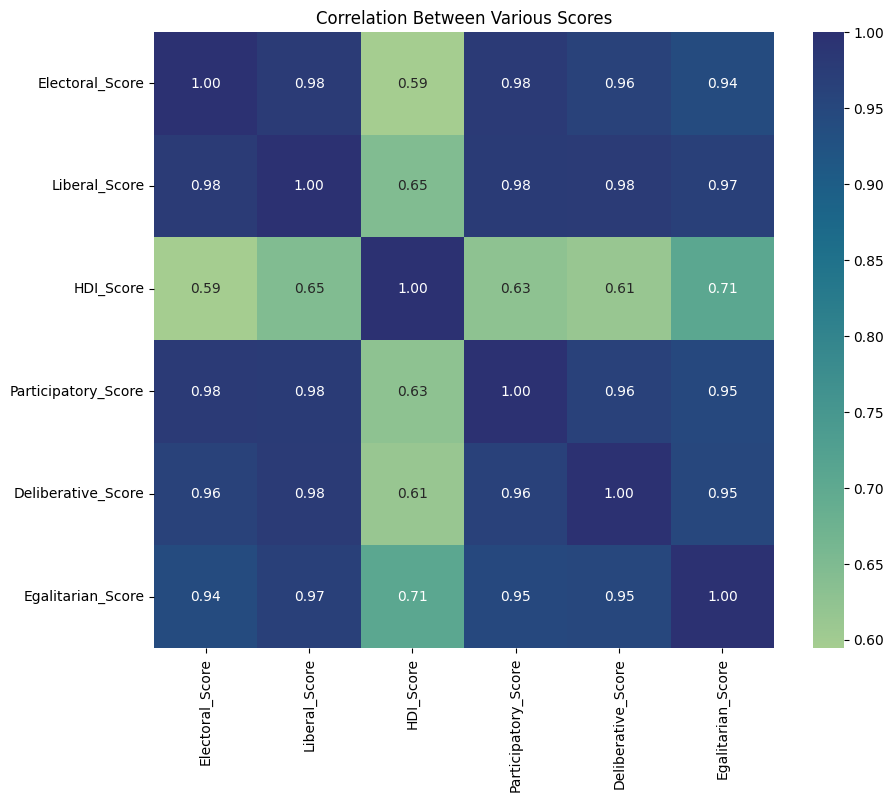

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Electoral_Score', 'Liberal_Score', 'HDI_Score',
                'Participatory_Score', 'Deliberative_Score', 'Egalitarian_Score']].corr(),
            annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Between Various Scores')
plt.show()

In [55]:
data_numberic= df.select_dtypes(include=['int64','float64'])
data_numberic=data_numberic.drop(['Year','id','protest'],axis=1)

correlation=data_numberic.corr()
# print the correlation matrix plot
fig = px.imshow(correlation, title='Correlation Matrix')
fig.show()

In [56]:
data_response_demand = df.groupby(['stateresponse1', 'protesterdemand1']).size().reset_index(name='count')
data_response_demand['log_count'] = np.log1p(data_response_demand['count'])
fig = px.imshow(data_response_demand.pivot(index='stateresponse1', columns='protesterdemand1', values='log_count').fillna(0), title='Number of records for each state response and protester demand')
# set size of the heatmap
fig.update_layout(width=800, height=800)
fig.show()

In [57]:
# find the violend records in the data for each year
data_violence = df[df['protesterviolence'] == 1]
data_violence_count = data_violence.groupby('Year').size().reset_index(name='vio_count')
# Group data by year and count total records per year

data_violence_trend = df.groupby('Year').size().reset_index(name='total_count')

# Merge total yearly count with violence/no violence counts
data_violence_ratio = data_violence_count.merge(data_violence_trend, on='Year')

In [58]:
# Calculate the ratio of violence/no violence for each year
data_violence_ratio['ratio'] = data_violence_ratio['vio_count'] / data_violence_ratio['total_count']

# Display the first few rows of the resulting dataframe
print(data_violence_ratio.head())

   Year  vio_count  total_count     ratio
0  1990        127          413  0.307506
1  1991         76          276  0.275362
2  1992         86          302  0.284768
3  1993         79          275  0.287273
4  1994        102          337  0.302671


In [59]:
# Plot the ratio of violence records over the years,along with the total number of records and the number of violence records
fig = px.line(data_violence_ratio, x='Year', y='total_count', title='Number of records per year', labels={'total_count': 'Total Records'})
fig.add_scatter(x=data_violence_ratio['Year'], y=data_violence_ratio['vio_count'], name='Violence Records', mode='lines')
fig.add_scatter(x=data_violence_ratio['Year'], y=data_violence_ratio['ratio'], name='Violence Ratio', mode='lines', yaxis='y2', line=dict(dash='dash'))
fig.update_layout(yaxis2={'overlaying': 'y', 'side': 'right', 'title': 'Violence Ratio', 'range': [0, 1]})
fig.show()

In [60]:
data_country_year = df.groupby(['Country', 'Year', 'region']).size().reset_index(name='count')
data_country_year = data_country_year.sort_values(['Year', 'count'], ascending=[True, False])
data_country_year_top10 = data_country_year.groupby('Year').head(10)

fig = px.bar(
    data_country_year_top10, 
    y='Country', 
    x='count', 
    color='region', 
    animation_frame='Year', 
    title='Top 10 Countries with the Highest Records per Year'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    yaxis_title=None,
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {'frame': {'duration': 2000, 'redraw': True}, 'fromcurrent': True}]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}]
            }
        ]
    }]
)

fig.show()

In [61]:
data_region_year = df.groupby(['region', 'Year']).size().reset_index(name='count')
fig = px.imshow(data_region_year.pivot(index='region', columns='Year', values='count').fillna(0), title='Number of records in each region per year')
fig.show()

## <div style="color:black;display:fill;border-radius:5px;background-color:#E27E7E;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:90%;margin:0"><b>4.1 |</b> Europe Analysis </p></div>

In [62]:
gr = df.groupby('region')['region'].size().reset_index(name='count')
gr.head()

,region,count
0,Africa,2761
1,Asia,2485
2,Central America,451
3,Europe,4218
4,MENA,983


In [63]:
fig = px.pie(gr, values='count', names='region', title='Region Protests Distribution')
fig.show()

In [64]:
df_Europe = df[df['region'] == 'Europe'].drop('region', axis=1)
df_Africa = df[df['region'] == 'Africa'].drop('region', axis=1)
df_Asia = df[df['region'] == 'Asia'].drop('region', axis=1)
df_North_America = df[df['region'] == 'North America'].drop('region', axis=1)
df_South_America = df[df['region'] == 'South America'].drop('region', axis=1)
df_Central_America = df[df['region'] == 'Central America'].drop('region', axis=1)
df_MENA = df[df['region'] == 'MENA'].drop('region', axis=1)

In [65]:
df_Europe.head()

,id,Country,Year,protest,protesterviolence,protesterdemand1,stateresponse1,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob,protester_demands
2167,2001990001,United Kingdom,1990,1,0,labor wage dispute,ignore,0.817,0.745,0.573,0.695,0.673,0.781,0,0.315732,labor wage dispute
2168,2001990002,United Kingdom,1990,1,0,"price increases, tax policy",ignore,0.817,0.745,0.573,0.695,0.673,0.781,0,0.315732,"price increases, tax policy, political behavio..."
2169,2001990003,United Kingdom,1990,1,0,"political behavior, process",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732,"political behavior, process, price increases, ..."
2170,2001990004,United Kingdom,1990,1,0,"price increases, tax policy",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732,"price increases, tax policy, political behavio..."
2171,2001990005,United Kingdom,1990,1,0,"price increases, tax policy",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732,"price increases, tax policy, political behavio..."


In [66]:
df_Europe['protesterdemand1'].value_counts()

protesterdemand1
political behavior, process    2723
labor wage dispute              556
price increases, tax policy     354
removal of politician           199
social restrictions             141
police brutality                124
land farm issue                 121
Name: count, dtype: int64

In [67]:
df_Europe['stateresponse1'].value_counts()

stateresponse1
ignore             2838
crowd dispersal     908
arrests             209
accomodation        201
beatings             41
shootings            15
Unknown               3
killings              3
Name: count, dtype: int64

In [68]:
fig = px.box(df_Europe, x='Country', y='Year', color='protesterviolence')
fig.show()